Configurações

In [17]:
import pandas as pd

# Dados
dados = {
    'T': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8'],
    'Temperatura': [10, 8, 6, 5, 20, 22, 23, 18],
    'Umidade': [20, 13, 15, 11, 26, 26, 27, 23],
    'Flor': [1, 0, 1, 1, 0, 0, 1, 0]
}

# Criando o DataFrame
matriz = pd.DataFrame(dados)

# Ponto C1
c1 = (5, 10)

# Ponto C2
c2 = (25, 20)

# K
k = 3

Calculos

In [18]:
from math import sqrt

# Função para calcular a distância euclidiana entre dois pontos
def distancia_euclidiana(ponto1, ponto2):
    return sqrt((ponto1[0] - ponto2[0]) ** 2 + (ponto1[1] - ponto2[1]) ** 2)

# Calculando as distâncias para o ponto C1
matriz['Distancia_C1'] = matriz.apply(lambda row: distancia_euclidiana((row['Temperatura'], row['Umidade']), c1), axis=1)

# Ordenando o DataFrame com base nas distâncias para o ponto C1
matriz_c1 = matriz.sort_values(by='Distancia_C1')

# Calculando as distâncias para o ponto C2
matriz['Distancia_C2'] = matriz.apply(lambda row: distancia_euclidiana((row['Temperatura'], row['Umidade']), c2), axis=1)

# Ordenando o DataFrame com base nas distâncias para o ponto C2
matriz_c2 = matriz.sort_values(by='Distancia_C2')

# Mostrando as classificações para os k vizinhos mais próximos
resultado_c1 = matriz_c1.head(k)['Flor'].value_counts().idxmax()
resultado_c2 = matriz_c2.head(k)['Flor'].value_counts().idxmax()

# Exibindo os resultados
print("Resultado para C1:", resultado_c1)
print("Resultado para C2:", resultado_c2)

Resultado para C1: 1
Resultado para C2: 0


Provas com base na distancia

    T  Distancia_C1  Distancia_C2
0  T1     11.180340     15.000000
1  T2      4.242641     18.384776
2  T3      5.099020     19.646883
3  T4      1.000000     21.931712
4  T5     21.931712      7.810250
5  T6     23.345235      6.708204
6  T7     24.758837      7.280110
7  T8     18.384776      7.615773


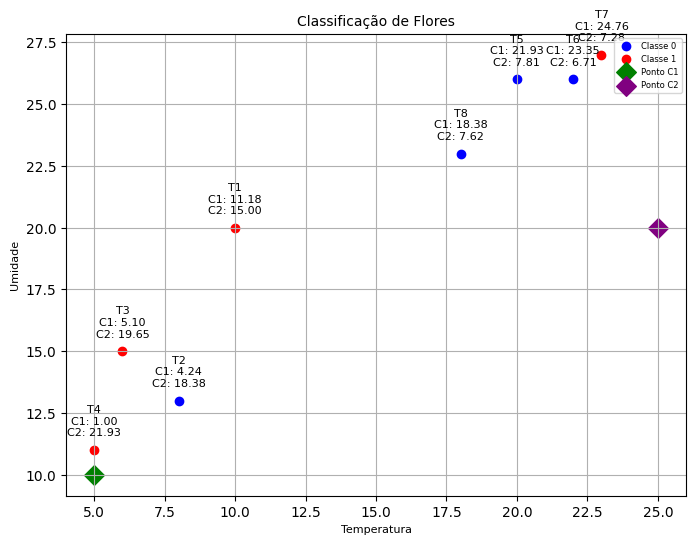

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Adicionando coluna para distância C1 e C2 ao DataFrame
matriz['Distancia_C1'] = matriz.apply(lambda row: distancia_euclidiana((row['Temperatura'], row['Umidade']), c1), axis=1)
matriz['Distancia_C2'] = matriz.apply(lambda row: distancia_euclidiana((row['Temperatura'], row['Umidade']), c2), axis=1)

# Mostrando o DataFrame com as distâncias
print(matriz[['T', 'Distancia_C1', 'Distancia_C2']])

# Criando o gráfico
plt.figure(figsize=(8, 6))

# Plotando os pontos de dados
plt.scatter(classe_0['Temperatura'], classe_0['Umidade'], color='blue', label='Classe 0')
plt.scatter(classe_1['Temperatura'], classe_1['Umidade'], color='red', label='Classe 1')

# Destacando os pontos C1 e C2
plt.scatter(c1[0], c1[1], color='green', marker='D', s=100, label='Ponto C1')
plt.scatter(c2[0], c2[1], color='purple', marker='D', s=100, label='Ponto C2')

# Adicionando rótulos e legenda com fonte menor
plt.title('Classificação de Flores', fontsize=10)
plt.xlabel('Temperatura', fontsize=8)
plt.ylabel('Umidade', fontsize=8)
plt.legend(fontsize=6)

# Adicionando linhas de distância com fonte menor
for index, row in matriz.iterrows():
    plt.annotate(f"{row['T']}\nC1: {row['Distancia_C1']:.2f}\nC2: {row['Distancia_C2']:.2f}",
                 (row['Temperatura'], row['Umidade']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Exibindo o gráfico
plt.grid(True)
plt.show()
